# Simple Linear Regression

## Importing the libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import mglearn
     

## Importing the dataset

In [5]:
dataset = pd.read_csv('Automobile.csv')

## Splitting the dataset into the Training set and Test set

In [29]:
# Hapus baris yang mengandung NaN pada kolom target (symboling)
dataset = dataset.dropna(subset=['symboling'])

# Isi nilai NaN pada kolom numerik dengan mean
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numerical_cols] = dataset[numerical_cols].fillna(dataset[numerical_cols].mean())

# Isi nilai NaN pada kolom kategorikal dengan mode
categorical_cols = dataset.select_dtypes(include=['object']).columns
dataset[categorical_cols] = dataset[categorical_cols].fillna(dataset[categorical_cols].mode().iloc[0])

# Lakukan one-hot encoding untuk kolom kategorikal
dataset = pd.get_dummies(dataset, drop_first=True)

X = dataset.drop(columns=['symboling'])
y = dataset['symboling']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Simple Linear Regression model on the Training set

In [30]:
# Handle categorical data (one-hot encoding)
X = pd.get_dummies(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully.")

Model trained successfully.


## Predicting the Test set results

In [31]:
# Predicting the Test set results
y_pred = model.predict(X_test)

## Visualising the Training set results

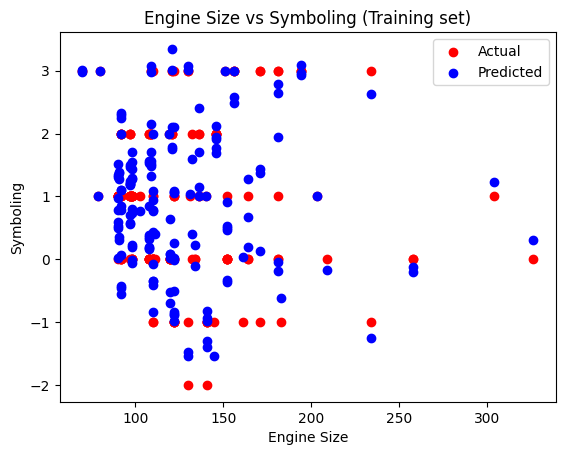

In [35]:
# Visualising the Training set results
plt.scatter(X_train['engine-size'], y_train, color='red', label='Actual')
plt.scatter(X_train['engine-size'], model.predict(X_train), color='blue', label='Predicted')
plt.title('Engine Size vs Symboling (Training set)')
plt.xlabel('Engine Size')
plt.ylabel('Symboling')
plt.legend()
plt.show()

## Visualising the Test set results

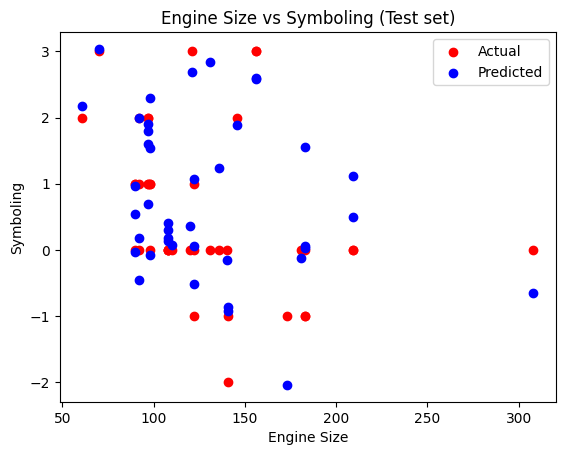

In [34]:
# Visualising the Test set results
plt.scatter(X_test['engine-size'], y_test, color='red', label='Actual')
plt.scatter(X_test['engine-size'], y_pred, color='blue', label='Predicted')
plt.title('Engine Size vs Symboling (Test set)')
plt.xlabel('Engine Size')
plt.ylabel('Symboling')
plt.legend()
plt.show()

## Building the Linear Regression Model

In [36]:
# Melakukan prediksi
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

MSE: 0.565368854764571
RMSE: 0.7519101374263889
R-squared: 0.61429178374219


### Explanation of Mathematical Equations

1. **Mean Squared Error (MSE):**  
   Mean Squared Error (MSE)
   MSE adalah metrik yang mengukur rata-rata kuadrat kesalahan antara nilai aktual (y_i) dan nilai prediksi (ŷ_i).

   Rumus:
   
   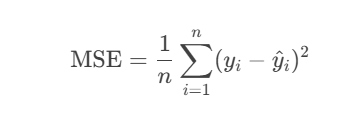

   Penjelasan:
   yi: Nilai aktual (target) untuk data ke-i.
   y^i : Nilai prediksi untuk data ke-i.
   n: Jumlah total data.

   Interpretasi:
   MSE mengukur seberapa besar kesalahan prediksi model.
   Semakin kecil nilai MSE, semakin baik performa model.
   Kelemahan: MSE sensitif terhadap outlier karena kesalahan dipangkatkan dua.`

2. **Root Mean Squared Error (RMSE):**
   RMSE adalah akar kuadrat dari MSE. Metrik ini memberikan kesalahan dalam satuan yang sama dengan target.
   Rumus:

   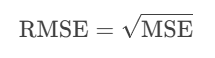
   
   Penjelasan:
   RMSE adalah akar kuadrat dari MSE.
   Satuan RMSE sama dengan satuan target (symboling dalam kasus ini).

   Interpretasi:
   RMSE lebih mudah diinterpretasikan karena satuan kesalahan sama dengan target.
   Semakin kecil nilai RMSE, semakin baik performa model

3. **R-squared (R²):**
   R-squared adalah metrik yang mengukur seberapa baik model menjelaskan variasi dalam data target.

   Rumus:
   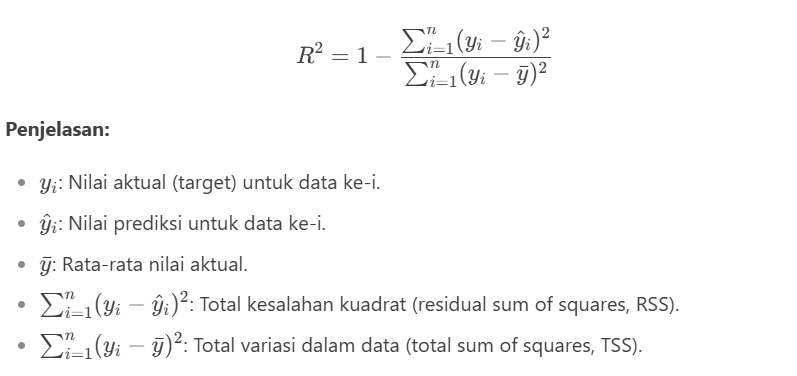

   R-squared berkisar antara 0 dan 1.
   - R^2 = 1: Model sempurna (semua variasi dalam data target dijelaskan oleh model).
   - R^2 =0: Model tidak menjelaskan variasi dalam data target.
   
   Semakin tinggi nilai R-squared, semakin baik model menjelaskan variasi dalam data.